In [359]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from config import api_key
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy
%matplotlib inline

In [360]:
quandl.ApiConfig.api_key = api_key
#Variance Risk Premium: https://sites.google.com/site/haozhouspersonalhomepage
#EOM Nominal S&P, Nominal Dividends / Nominal Risk Free Rate: http://www.hec.unil.ch/agoyal/
#Consumer Sentiment: http://www.sca.isr.umich.edu/

In [361]:
file = '1989_2018_Data.csv'

data = pd.read_csv(file)
df1 = pd.DataFrame(data)
df1.head()
df1.tail()

,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D
0,1989-01-01,297.47,9.837,0.006892,9.12,NaN,97.9,30.239911,NaN,NaN,NaN,NaN,-3.327232,NaN,NaN
1,1989-02-01,288.86,9.924,0.007108,9.36,NaN,95.4,29.107215,NaN,NaN,NaN,-3.327232,1.634400,NaN,NaN
2,1989-03-01,294.87,10.011,0.007350,9.85,NaN,94.3,29.454600,NaN,NaN,NaN,1.634400,4.574438,4.961632,NaN
3,1989-04-01,309.64,10.130,0.007208,9.84,NaN,91.5,30.566634,NaN,NaN,NaN,4.574438,3.087089,2.940038,NaN
4,1989-05-01,320.52,10.249,0.007025,9.81,NaN,90.7,31.273295,NaN,NaN,NaN,3.087089,-1.202067,-1.487349,NaN


,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D
355,2018-08-01,2901.520020,52.31,0.001725,1.91,8.5030,96.2,55.467789,0.75,9.972800,-0.6,3.008605,0.401619,-0.586789,0.352074
356,2018-09-01,2913.979980,52.70,0.001792,1.95,7.9528,100.1,55.293738,0.80,8.198900,5.0,0.401619,-6.979372,-2.606986,-13.034928
357,2018-10-01,2711.739990,53.08,0.001908,2.19,-2.2509,98.6,51.087792,1.04,4.734967,-2.1,-6.979372,1.757748,-7.380991,15.500082
358,2018-11-01,2760.169922,53.74,0.001933,2.20,2.7329,97.5,51.361554,1.04,2.811600,-1.0,1.757748,-9.213509,8.737120,-8.737120
359,2018-12-01,2506.850098,54.38,0.002000,2.27,-4.0034,98.3,46.098751,0.97,-1.173800,2.4,-9.213509,NaN,-10.971257,-26.331017


In [362]:
df_all_csv = '2004_to_2018_withGoogle.csv'

df_all_data = pd.read_csv(df_all_csv)
df_all = pd.DataFrame(df_all_data)

df_all.head()
df_all.tail()

,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D
0,2004-01-01,1131.13,17.598000,0.000733,1.00,14.0860,103.8,64.276054,-0.24,16.151067,21.4,1.786198,1.274621,-3.352254,-71.738239,28.0,0.273743
1,2004-02-01,1144.94,17.811000,0.000775,1.01,9.8728,94.4,64.282747,-0.25,14.917533,14.5,1.274621,-1.583041,-0.511577,-7.417861,28.0,0.000000
2,2004-03-01,1126.21,18.024000,0.000783,1.00,9.4462,95.8,62.483910,-0.25,11.135000,18.2,-1.583041,-1.622623,-2.857662,-52.009454,26.0,-2.000000
3,2004-04-01,1107.30,18.216667,0.000783,1.00,13.4427,94.2,60.784995,-0.26,10.920567,8.2,-1.622623,1.261890,-0.039582,-0.324572,25.0,-1.000000
4,2004-05-01,1120.68,18.409333,0.000850,1.00,5.2403,90.2,60.875643,-0.26,9.376400,-1.9,1.261890,1.831398,2.884513,-5.480574,23.0,-2.000000


,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D
175,2018-08-01,2901.520020,52.31,0.001725,1.91,8.5030,96.2,55.467789,0.75,9.972800,-0.6,3.008605,0.401619,-0.586789,0.352074,33.0,1.0
176,2018-09-01,2913.979980,52.70,0.001792,1.95,7.9528,100.1,55.293738,0.80,8.198900,5.0,0.401619,-6.979372,-2.606986,-13.034928,31.0,-2.0
177,2018-10-01,2711.739990,53.08,0.001908,2.19,-2.2509,98.6,51.087792,1.04,4.734967,-2.1,-6.979372,1.757748,-7.380991,15.500082,62.0,31.0
178,2018-11-01,2760.169922,53.74,0.001933,2.20,2.7329,97.5,51.361554,1.04,2.811600,-1.0,1.757748,-9.213509,8.737120,-8.737120,48.0,-14.0
179,2018-12-01,2506.850098,54.38,0.002000,2.27,-4.0034,98.3,46.098751,0.97,-1.173800,2.4,-9.213509,NaN,-10.971257,-26.331017,77.0,29.0


In [363]:
#Create Filter for 1990 to 2018
filt_1990 = (df1['EOM'] >= '1990-03') & (df1['EOM'] < '2018-01')
dfx = df1[filt_1990]

#Create Filter for 2004 to 2017
filt_2004 = (df_all['EOM'] >= '2004-01-01') & (df_all['EOM'] < '2018-01-01')
df04 = df_all[filt_2004]

#Create FIlter for 2017 - 2018
filt_2018 = (df_all['EOM'] >= '2016-12-01') & (df_all['EOM'] < '2019-01-01')
df18 = df_all[filt_2018]

In [364]:
df04.head()
df04.tail()

,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D
0,2004-01-01,1131.13,17.598000,0.000733,1.00,14.0860,103.8,64.276054,-0.24,16.151067,21.4,1.786198,1.274621,-3.352254,-71.738239,28.0,0.273743
1,2004-02-01,1144.94,17.811000,0.000775,1.01,9.8728,94.4,64.282747,-0.25,14.917533,14.5,1.274621,-1.583041,-0.511577,-7.417861,28.0,0.000000
2,2004-03-01,1126.21,18.024000,0.000783,1.00,9.4462,95.8,62.483910,-0.25,11.135000,18.2,-1.583041,-1.622623,-2.857662,-52.009454,26.0,-2.000000
3,2004-04-01,1107.30,18.216667,0.000783,1.00,13.4427,94.2,60.784995,-0.26,10.920567,8.2,-1.622623,1.261890,-0.039582,-0.324572,25.0,-1.000000
4,2004-05-01,1120.68,18.409333,0.000850,1.00,5.2403,90.2,60.875643,-0.26,9.376400,-1.9,1.261890,1.831398,2.884513,-5.480574,23.0,-2.000000


,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D
163,2017-08-01,2471.649902,47.855075,0.000842,1.16,4.5638,96.8,51.648647,0.76,5.472033,7.0,0.131911,2.006883,-1.877269,-13.140885,27.0,4.0
164,2017-09-01,2519.360107,48.173103,0.000858,1.15,4.9171,95.1,52.298066,0.75,5.112567,3.9,2.006883,2.289827,1.874972,7.312391,24.0,-3.0
165,2017-10-01,2575.260010,48.426075,0.000892,1.15,6.5894,100.7,53.179202,0.75,5.356767,13.5,2.289827,0.427026,0.282943,3.819735,29.0,5.0
166,2017-11-01,2584.840088,48.679047,0.001025,1.16,6.9722,98.5,53.099644,0.75,6.159567,4.7,0.427026,3.482009,-1.862801,-8.755164,32.0,3.0
167,2017-12-01,2673.610107,48.932019,0.001100,1.30,6.1073,95.9,54.639276,0.76,6.556300,-2.3,3.482009,5.655429,3.054983,-7.026461,34.0,2.0


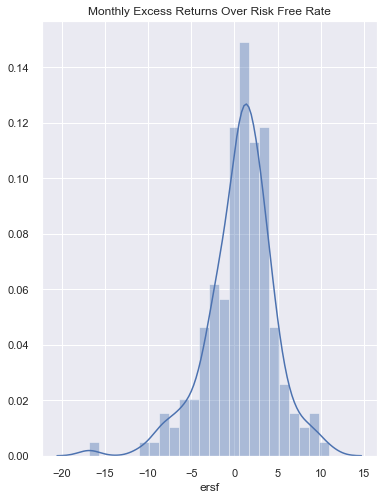

In [367]:
sns.set()
fig = plt.figure(figsize=(6,8))
ax1 = sns.distplot(df04['ersf'], bins=24).set_title('Monthly Excess Returns Over Risk Free Rate');

In [54]:
dfx.describe()
dfx.corr()

,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,1163.313893,22.396469,0.002270,2.937904,17.307943,86.840719,52.045820,-0.289132,17.390332,0.176347,0.658096,0.668887,0.008948,-3.635747
std,543.692853,10.218236,0.001883,2.408457,13.929337,12.484535,14.204175,1.405820,11.135081,10.053697,4.100433,4.108844,5.683893,57.413770
min,304.000000,11.318000,0.000008,0.070000,-9.724000,55.300000,25.507636,-4.580000,3.052700,-30.000000,-16.793245,-16.793245,-13.574290,-294.411915
25%,764.380000,15.019000,0.000179,0.225000,8.354675,77.600000,44.239881,-0.757500,9.454383,-4.250000,-1.668809,-1.668809,-3.672094,-18.127597
50%,1158.590000,17.704500,0.002408,3.000000,13.408600,88.950000,51.087280,-0.030000,13.623633,1.100000,1.022578,1.022578,-0.036734,-0.231316
75%,1415.175000,27.594417,0.004115,5.250000,23.482400,94.925000,58.380221,0.297500,23.211900,6.500000,3.324716,3.343992,3.327125,13.259903
max,2673.610107,48.932019,0.006583,8.290000,80.610800,112.000000,92.170533,2.670000,59.880367,22.800000,11.090639,11.090639,20.864358,279.621622


,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D
Index,1.000000,0.902141,-0.549448,-0.527675,-0.254825,0.173381,0.405512,0.260710,-0.305007,0.118145,0.045316,-0.024237,0.001832,0.040746
D12,0.902141,1.000000,-0.666138,-0.649351,-0.267992,-0.104491,-0.016092,0.155327,-0.340338,0.098251,0.016986,0.027360,0.003475,0.025727
Rfree,-0.549448,-0.666138,1.000000,0.995661,0.102202,0.427237,0.072414,0.144739,0.119237,-0.138734,-0.017698,-0.026238,-0.009751,0.012278
fed_funds,-0.527675,-0.649351,0.995661,1.000000,0.112788,0.414117,0.090527,0.123847,0.133474,-0.174604,-0.023561,-0.029025,-0.006417,0.003342
VRP,-0.254825,-0.267992,0.102202,0.112788,1.000000,-0.087792,0.045263,-0.303380,0.798353,-0.186667,-0.235717,0.148504,-0.111396,-0.047591
ICS_ALL,0.173381,-0.104491,0.427237,0.414117,-0.087792,1.000000,0.588048,0.417148,-0.108570,0.413256,0.047155,-0.001448,-0.060053,0.048127
pd,0.405512,-0.016092,0.072414,0.090527,0.045263,0.588048,1.000000,0.204664,0.086752,0.029760,0.032415,-0.115720,-0.001570,0.029592
ff12_D,0.260710,0.155327,0.144739,0.123847,-0.303380,0.417148,0.204664,1.000000,-0.360951,0.350276,0.129061,0.141650,-0.000043,0.039779
vrp3,-0.305007,-0.340338,0.119237,0.133474,0.798353,-0.108570,0.086752,-0.360951,1.000000,-0.206029,0.040064,0.207055,0.077389,-0.167591
sent12_D,0.118145,0.098251,-0.138734,-0.174604,-0.186667,0.413256,0.029760,0.350276,-0.206029,1.000000,0.170626,0.096744,-0.063843,0.052724


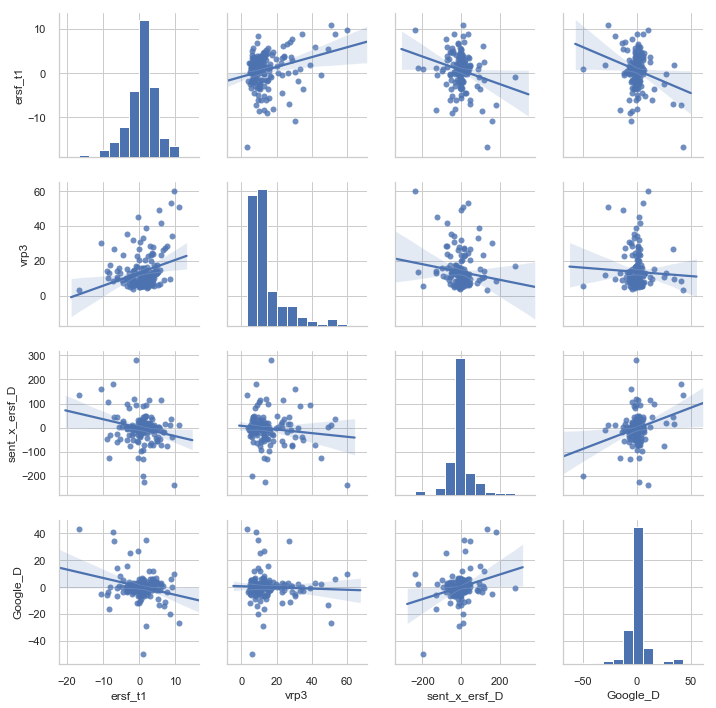

In [258]:
sns.set(style='whitegrid', palette='deep')
sns.pairplot(df04, vars=['ersf_t1','vrp3', 'sent_x_ersf_D', 'Google_D'],
                 kind='reg');

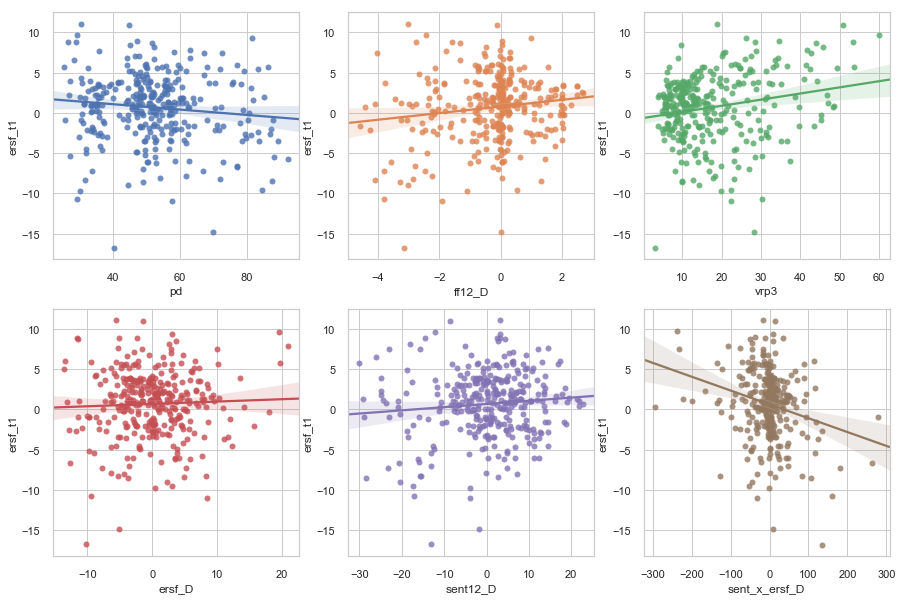

In [56]:
sns.set(style='whitegrid', palette='deep')
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(15, 10))

sns.regplot(x='pd', y='ersf_t1', data=dfx, ax=axs[0,0])
sns.regplot(x='ff12_D', y='ersf_t1', data=dfx, ax=axs[0,1])
sns.regplot(x='vrp3', y='ersf_t1', data=dfx, ax=axs[0,2])
sns.regplot(x='ersf_D', y='ersf_t1', data=dfx, ax=axs[1,0])
sns.regplot(x='sent12_D', y='ersf_t1', data=dfx, ax=axs[1,1])
sns.regplot(x='sent_x_ersf_D', y='ersf_t1', data=dfx, ax=axs[1,2]);

## Regression Models without Google

In [397]:
#Regression Model with the following variables: Price-Dividend / Fed_Funds_Rate / Variance Risk Premium / Sentiment X Momentum
lr_model_no_google = ols(formula='ersf_t1~pd+ff12_D+vrp3+sent_x_ersf_D', data=dfx).fit()
lr_model_no_google.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ersf_t1   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     17.29
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           6.93e-13
Time:                        14:42:11   Log-Likelihood:                -913.55
No. Observations:                 334   AIC:                             1837.
Df Residuals:                     329   BIC:                             1856.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.9144      0.831      2.305      0.022       0.281       3.548
pd               -0.0569      0.015     -3.777      0.000      -0.087      -0.027
ff12_D            0.8696      0.162      5.352      0.000       0.550       1.189
vrp3              0.1102      0.020      5.391      0.000       0.070       0.150
sent_x_ersf_D    -0.0140      0.004     -3.844      0.000      -0.021      -0.007
==============================================================================
Omnibus:                       29.202   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.189
Skew:                          -0.648   Prob(JB):                     5.10e-09
Kurtosis:                       4.031   Cond. No.                         238.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [262]:
#Run same Linear Regression with sklearn
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

ind_variables = ['pd', 'ff12_D', 'vrp3', 'sent_x_ersf_D']
X = pd.DataFrame(dfx, columns=ind_variables)
y = pd.DataFrame(dfx, columns=['ersf_t1'])

sk_model_no_google = linear_model.LinearRegression()
model = sk_model_no_google.fit(X,y)

In [263]:
#Predicting January 2018 Returns
predictions = model.predict(X)
print(predictions[-1])

[0.28691542]


In [264]:
#sklearn R-Squared Value, Coefficients, Intercept
model.score(X,y), model.coef_, model.intercept_

(0.17368901414785176,
 array([[-0.05690916,  0.86957153,  0.11022393, -0.01400725]]),
 array([1.91443402]))

## Exploring Google Trends Impact

In [281]:
#Coefficients with Google Trends - Change in Searches for the Term "Stock Market"
df04.describe()
df04.corr()

,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,1522.179168,30.249718,0.000999,1.341131,13.576756,81.947619,50.869848,-0.008988,13.648133,0.652976,0.667949,0.690980,-0.009860,-2.599680,25.440476,0.037344
std,443.859461,8.958708,0.001367,1.769762,12.989038,11.785792,6.591079,1.259412,10.059378,10.351389,3.886939,3.905026,5.113633,58.594285,9.801443,9.600349
min,735.090000,17.598000,0.000008,0.070000,-9.470800,55.300000,26.602531,-4.100000,3.052700,-29.200000,-16.793245,-16.793245,-11.633423,-238.769031,14.000000,-50.000000
25%,1190.170000,22.992000,0.000056,0.127500,5.828050,73.575000,47.992094,-0.090000,7.129600,-4.350000,-1.407628,-1.407628,-3.601212,-16.721380,20.000000,-3.000000
50%,1378.935000,27.556500,0.000183,0.230000,9.963050,83.050000,51.074718,0.030000,10.431000,1.900000,1.036320,1.036320,-0.055229,-0.272416,23.000000,0.000000
75%,1924.500000,37.473505,0.001448,2.002500,17.149400,92.025000,55.652819,0.407500,14.947467,7.100000,2.996938,3.008325,2.903168,12.706484,27.000000,2.000000
max,2673.610107,48.932019,0.004192,5.260000,77.816100,103.800000,64.282747,2.070000,59.880367,21.800000,10.959159,10.959159,19.571232,279.621622,100.000000,43.000000


,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D
Index,1.000000,0.926910,-0.197435,-0.189128,-0.377489,0.579347,0.091090,0.240900,-0.460633,0.233288,0.131134,0.039784,0.004965,0.056154,0.082610,0.031602
D12,0.926910,1.000000,-0.372532,-0.355154,-0.198381,0.361418,-0.283143,-0.030664,-0.265411,0.135172,0.042347,0.061087,0.014146,0.025965,0.234291,0.018707
Rfree,-0.197435,-0.372532,1.000000,0.991658,-0.270263,0.267316,0.477579,0.422660,-0.363454,-0.243364,-0.069381,-0.088300,-0.019006,0.050823,-0.101470,0.027062
fed_funds,-0.189128,-0.355154,0.991658,1.000000,-0.268302,0.230430,0.448993,0.357401,-0.355477,-0.281639,-0.088243,-0.109110,-0.018672,0.047813,-0.077483,0.034542
VRP,-0.377489,-0.198381,-0.270263,-0.268302,1.000000,-0.483545,-0.468140,-0.371260,0.769026,-0.060501,-0.240775,0.204762,-0.122761,0.018431,0.009761,-0.093908
ICS_ALL,0.579347,0.361418,0.267316,0.230430,-0.483545,1.000000,0.582132,0.635770,-0.599270,0.489859,0.109358,0.056348,-0.062101,0.015227,-0.063983,0.032589
pd,0.091090,-0.283143,0.477579,0.448993,-0.468140,0.582132,1.000000,0.706587,-0.512646,0.231991,0.195010,-0.070603,-0.030940,0.068783,-0.363775,0.032186
ff12_D,0.240900,-0.030664,0.422660,0.357401,-0.371260,0.635770,0.706587,1.000000,-0.418635,0.347842,0.212527,0.199452,-0.012541,0.034151,-0.330206,0.025709
vrp3,-0.460633,-0.265411,-0.363454,-0.355477,0.769026,-0.599270,-0.512646,-0.418635,1.000000,-0.004952,0.072134,0.287742,0.087702,-0.130402,0.032049,-0.046311
sent12_D,0.233288,0.135172,-0.243364,-0.281639,-0.060501,0.489859,0.231991,0.347842,-0.004952,1.000000,0.267856,0.194197,-0.049284,-0.064181,-0.232290,0.001956


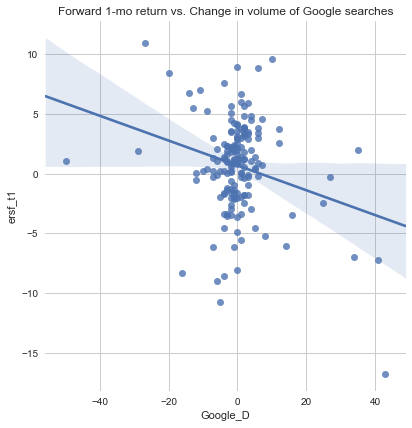

In [282]:
#Google Searches Change - Correlation with Target Variable
sns.set_style('whitegrid')
ax = sns.lmplot( x='Google_D', y='ersf_t1', data=df04, fit_reg=True)
ax.fig.set_size_inches(6,6)
plt.title('Forward 1-mo return vs. Change in volume of Google searches')
plt.show();

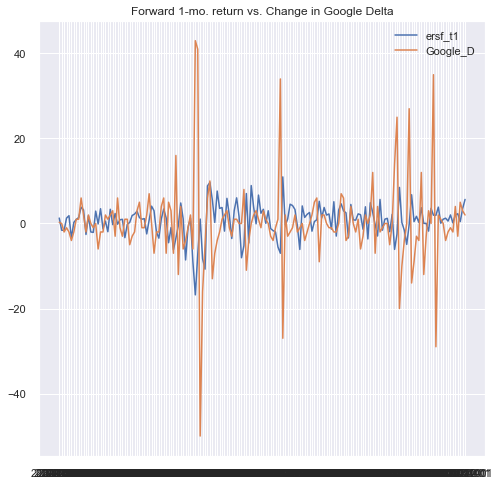

In [283]:
x = df04['EOM']
y = df04[['ersf_t1', 'Google_D']]

sns.set()
fig = plt.figure(figsize=(8,8))
plt.plot(x, y)
plt.title('Forward 1-mo. return vs. Change in Google Delta')
plt.legend(y);

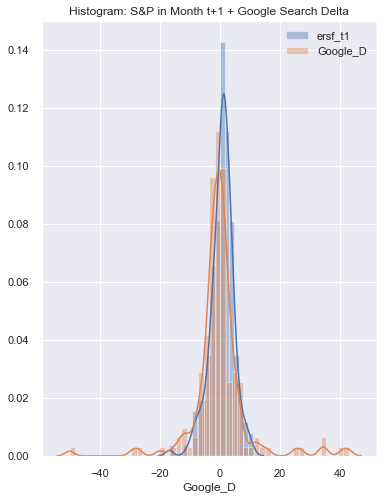

In [284]:
sns.set()
fig = plt.figure(figsize=(6,8))
ax1 = sns.distplot(df04['ersf_t1'])
ax2 = sns.distplot(df04['Google_D']).set_title('Histogram: S&P in Month t+1 + Google Search Delta')
plt.legend(y);

In [285]:
#OLS multilinear regression modle with Google
lr_model_with_google_04_18 = ols(formula='ersf_t1~pd+ff12_D+vrp3+sent_x_ersf_D+Google_D', data=df04).fit()
lr_model_with_google_04_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ersf_t1   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     14.63
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           7.89e-12
Time:                        11:44:53   Log-Likelihood:                -435.44
No. Observations:                 168   AIC:                             882.9
Df Residuals:                     162   BIC:                             901.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.3421      3.122      2.031      0.044       0.177      12.508
pd               -0.1484      0.058     -2.557      0.011      -0.263      -0.034
ff12_D            1.6608      0.287      5.784      0.000       1.094       2.228
vrp3              0.1386      0.030      4.649      0.000       0.080       0.197
sent_x_ersf_D    -0.0087      0.005     -1.909      0.058      -0.018       0.000
Google_D         -0.0847      0.028     -3.066      0.003      -0.139      -0.030
==============================================================================
Omnibus:                        9.600   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.844
Skew:                          -0.589   Prob(JB):                      0.00728
Kurtosis:                       3.138   Cond. No.                         724.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [286]:
#SK Learn OLS Model
ind_variables_w_google = ['pd', 'ff12_D', 'vrp3', 'sent_x_ersf_D', 'Google_D']
X_wG = pd.DataFrame(df04, columns=ind_variables_w_google)
y_wG = pd.DataFrame(df04, columns=['ersf_t1'])

sk_model_with_google_04_18 = linear_model.LinearRegression()
new_model = sk_model_with_google_04_18.fit(X_wG,y_wG)

In [287]:
predictions = new_model.predict(X_wG)
#2018-01 Prediction: 
predictions[-1]

array([0.29861124])

In [288]:
#R-Squared:
new_model.score(X_wG, y_wG)

0.31109372435374294

In [289]:
#Plot Residuals - Import modules
%matplotlib inline
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

In [290]:
#Clean up DFs for Residuals
df04.reset_index(drop=True, inplace=True)
df04.head()
df04.tail()

,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D
0,2004-01-01,1131.13,17.598000,0.000733,1.00,14.0860,103.8,64.276054,-0.24,16.151067,21.4,1.786198,1.274621,-3.352254,-71.738239,28.0,0.273743
1,2004-02-01,1144.94,17.811000,0.000775,1.01,9.8728,94.4,64.282747,-0.25,14.917533,14.5,1.274621,-1.583041,-0.511577,-7.417861,28.0,0.000000
2,2004-03-01,1126.21,18.024000,0.000783,1.00,9.4462,95.8,62.483910,-0.25,11.135000,18.2,-1.583041,-1.622623,-2.857662,-52.009454,26.0,-2.000000
3,2004-04-01,1107.30,18.216667,0.000783,1.00,13.4427,94.2,60.784995,-0.26,10.920567,8.2,-1.622623,1.261890,-0.039582,-0.324572,25.0,-1.000000
4,2004-05-01,1120.68,18.409333,0.000850,1.00,5.2403,90.2,60.875643,-0.26,9.376400,-1.9,1.261890,1.831398,2.884513,-5.480574,23.0,-2.000000


,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D
163,2017-08-01,2471.649902,47.855075,0.000842,1.16,4.5638,96.8,51.648647,0.76,5.472033,7.0,0.131911,2.006883,-1.877269,-13.140885,27.0,4.0
164,2017-09-01,2519.360107,48.173103,0.000858,1.15,4.9171,95.1,52.298066,0.75,5.112567,3.9,2.006883,2.289827,1.874972,7.312391,24.0,-3.0
165,2017-10-01,2575.260010,48.426075,0.000892,1.15,6.5894,100.7,53.179202,0.75,5.356767,13.5,2.289827,0.427026,0.282943,3.819735,29.0,5.0
166,2017-11-01,2584.840088,48.679047,0.001025,1.16,6.9722,98.5,53.099644,0.75,6.159567,4.7,0.427026,3.482009,-1.862801,-8.755164,32.0,3.0
167,2017-12-01,2673.610107,48.932019,0.001100,1.30,6.1073,95.9,54.639276,0.76,6.556300,-2.3,3.482009,5.655429,3.054983,-7.026461,34.0,2.0


In [291]:
#Printing out the model Parameters
lr_model_with_google_04_18.params

Intercept        6.342059
pd              -0.148351
ff12_D           1.660756
vrp3             0.138552
sent_x_ersf_D   -0.008713
Google_D        -0.084708
dtype: float64

In [292]:
# fitted values
model_fitted_y = lr_model_with_google_04_18.fittedvalues

# model residuals
model_residuals = lr_model_with_google_04_18.resid

# normalized residuals
model_norm_residuals = lr_model_with_google_04_18.get_influence().resid_studentized_internal

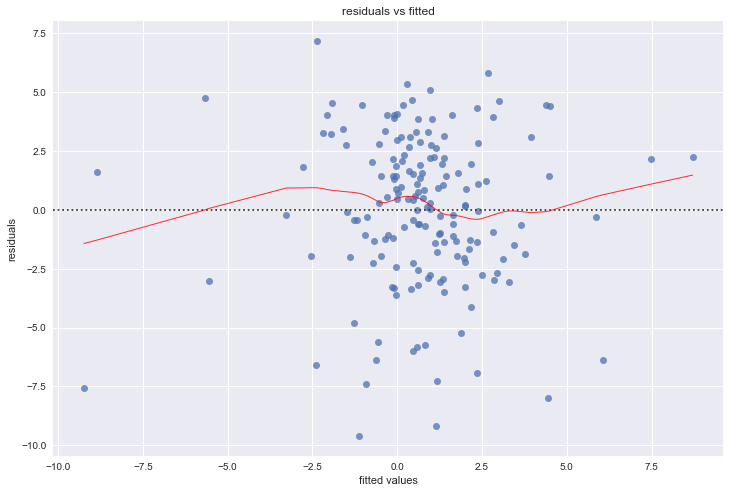

In [293]:
plt.style.use('seaborn')
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'ersf_t1', data=df04, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.75}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('residuals vs fitted')
plot_lm_1.axes[0].set_xlabel('fitted values')
plot_lm_1.axes[0].set_ylabel('residuals');

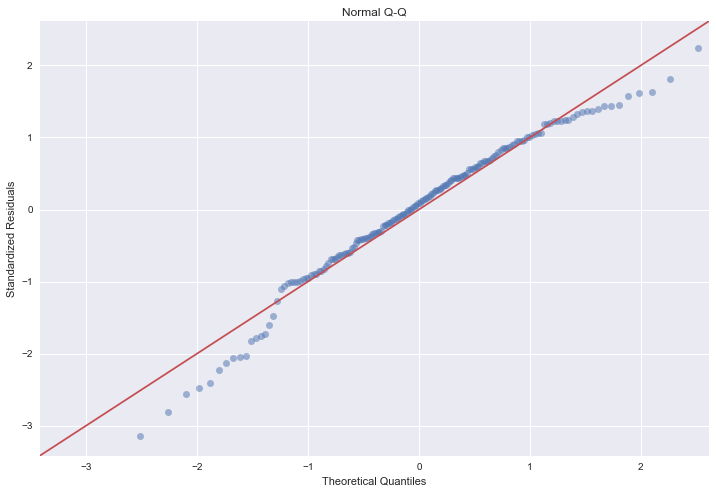

In [294]:
plt.style.use('seaborn')
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

In [295]:
#Calculating the Root Mean Squared Error on the Data
mse = mean_squared_error(df04['ersf_t1'], model_fitted_y)
rmse = np.sqrt(mse)
rmse

3.231525237083216

## Run Model on 2018 Untrained Data

In [296]:
df18.head()
df18.tail()

,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D
155,2016-12-01,2238.830000,45.700603,0.000425,0.54,12.5386,98.2,48.989069,0.30,12.019133,5.6,1.950777,1.916891,-1.607407,-9.001477,29.0,-29.0
156,2017-01-01,2278.870117,45.927877,0.000425,0.65,7.4651,98.5,49.618451,0.31,8.796700,6.5,1.916891,3.845262,-0.033886,-0.220260,31.0,2.0
157,2017-02-01,2363.639893,46.155150,0.000433,0.66,10.9366,96.3,51.210751,0.28,10.313433,4.6,3.845262,0.062941,1.928371,8.870506,32.0,1.0
158,2017-03-01,2362.719971,46.382424,0.000617,0.79,7.1965,96.9,50.939985,0.43,8.532733,5.9,0.062941,1.007029,-3.782321,-22.315693,32.0,0.0
159,2017-04-01,2384.199951,46.661289,0.000667,0.90,4.4930,97.0,51.095887,0.53,7.542033,8.0,1.007029,1.247525,0.944088,7.552702,28.0,-4.0


,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D
175,2018-08-01,2901.520020,52.31,0.001725,1.91,8.5030,96.2,55.467789,0.75,9.972800,-0.6,3.008605,0.401619,-0.586789,0.352074,33.0,1.0
176,2018-09-01,2913.979980,52.70,0.001792,1.95,7.9528,100.1,55.293738,0.80,8.198900,5.0,0.401619,-6.979372,-2.606986,-13.034928,31.0,-2.0
177,2018-10-01,2711.739990,53.08,0.001908,2.19,-2.2509,98.6,51.087792,1.04,4.734967,-2.1,-6.979372,1.757748,-7.380991,15.500082,62.0,31.0
178,2018-11-01,2760.169922,53.74,0.001933,2.20,2.7329,97.5,51.361554,1.04,2.811600,-1.0,1.757748,-9.213509,8.737120,-8.737120,48.0,-14.0
179,2018-12-01,2506.850098,54.38,0.002000,2.27,-4.0034,98.3,46.098751,0.97,-1.173800,2.4,-9.213509,NaN,-10.971257,-26.331017,77.0,29.0


In [297]:
#Build Independent Variable DF: 2017-12-01 predicts 2018-01-01, etc. 12 observations, from 2017-12-01 to 2018-11-01
filt_run = (df18['EOM'] >= '2017-12-01') & (df18['EOM'] < '2019-01-01')
run18 = df18[filt_run]
run18 = run18.head(12)

In [298]:
run18.head()

,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D
167,2017-12-01,2673.610107,48.932019,0.001100,1.30,6.1073,95.9,54.639276,0.76,6.556300,-2.3,3.482009,5.655429,3.054983,-7.026461,34.0,2.0
168,2018-01-01,2823.810059,50.550000,0.001200,1.41,10.0329,95.7,55.861722,0.76,7.704133,-2.8,5.655429,-3.880980,2.173420,-6.085576,43.0,9.0
169,2018-02-01,2713.830078,50.690000,0.001358,1.42,-5.9018,99.7,53.537780,0.76,3.412800,3.4,-3.880980,-2.673726,-9.536408,-32.423789,88.0,45.0
170,2018-03-01,2640.870117,50.930000,0.001417,1.51,8.6653,101.4,51.852938,0.72,4.265467,4.5,-2.673726,0.279697,1.207253,5.432640,48.0,-40.0
171,2018-04-01,2648.050049,51.070000,0.001533,1.69,-1.9751,98.8,51.851381,0.79,0.262800,1.8,0.279697,2.164428,2.953423,5.316162,43.0,-5.0


In [299]:
#Create DF with last twelve months of actual returns
df18_actual_returns = df18[['EOM', 'ersf']]
df18_actual_returns = df18_actual_returns.tail(12)
df18_actual_returns

,EOM,ersf
168,2018-01-01,5.655429
169,2018-02-01,-3.880980
170,2018-03-01,-2.673726
171,2018-04-01,0.279697
172,2018-05-01,2.164428
173,2018-06-01,0.485200
174,2018-07-01,3.595394
175,2018-08-01,3.008605
176,2018-09-01,0.401619
177,2018-10-01,-6.979372


In [300]:
#Select Indepdendent Variable from 2018 run, create DataFrame of Independent Variables
ind_variables = ['pd', 'ff12_D', 'vrp3', 'sent_x_ersf_D', 'Google_D']
X = pd.DataFrame(run18,columns=ind_variables)
X = X.set_index(run18['EOM'])
X

,pd,ff12_D,vrp3,sent_x_ersf_D,Google_D
EOM,,,,,
2017-12-01,54.639276,0.76,6.556300,-7.026461,2.0
2018-01-01,55.861722,0.76,7.704133,-6.085576,9.0
2018-02-01,53.537780,0.76,3.412800,-32.423789,45.0
2018-03-01,51.852938,0.72,4.265467,5.432640,-40.0
2018-04-01,51.851381,0.79,0.262800,5.316162,-5.0
2018-05-01,52.847627,0.79,5.365000,1.696258,-12.0
2018-06-01,52.845453,0.78,6.901400,-5.373529,1.0
2018-07-01,54.274235,0.76,10.273400,13.995876,0.0
2018-08-01,55.467789,0.75,9.972800,0.352074,1.0


In [301]:
#Make Predictions with new Model (including Google)
predictions_2018 = lr_model_with_google_04_18.predict(X)
predictions_2018
len(predictions_2018)

EOM
2017-12-01    0.298611
2018-01-01   -0.324860
2018-02-01   -3.394679
2018-03-01    3.777322
2018-04-01    0.375460
2018-05-01    1.559083
2018-06-01    0.716063
2018-07-01    0.854026
2018-08-01    0.652875
2018-09-01    0.886721
2018-10-01   -1.614668
2018-11-01    2.101276
dtype: float64

12

In [302]:
#Create Dataframe with Predictions
df_predictions = pd.DataFrame(predictions_2018)
df_predictions = df_predictions.rename(columns={0: 'pred_ret_next_mo'})

In [303]:
df_predictions

,pred_ret_next_mo
EOM,
2017-12-01,0.298611
2018-01-01,-0.324860
2018-02-01,-3.394679
2018-03-01,3.777322
2018-04-01,0.375460
2018-05-01,1.559083
2018-06-01,0.716063
2018-07-01,0.854026
2018-08-01,0.652875


In [304]:
#Create Summary Dataframe with Predictions & Independent Variables
df_summary = X
df_summary = pd.concat([X.reset_index(), df_predictions.reset_index(drop=True)], axis=1)
df_summary = df_summary.merge(df18_actual_returns, how='outer', on='EOM')
df_summary['ersf'] = df_summary['ersf'].shift(-1)
df_summary = df_summary.head(12)
df_summary

,EOM,pd,ff12_D,vrp3,sent_x_ersf_D,Google_D,pred_ret_next_mo,ersf
0,2017-12-01,54.639276,0.76,6.556300,-7.026461,2.0,0.298611,5.655429
1,2018-01-01,55.861722,0.76,7.704133,-6.085576,9.0,-0.324860,-3.880980
2,2018-02-01,53.537780,0.76,3.412800,-32.423789,45.0,-3.394679,-2.673726
3,2018-03-01,51.852938,0.72,4.265467,5.432640,-40.0,3.777322,0.279697
4,2018-04-01,51.851381,0.79,0.262800,5.316162,-5.0,0.375460,2.164428
5,2018-05-01,52.847627,0.79,5.365000,1.696258,-12.0,1.559083,0.485200
6,2018-06-01,52.845453,0.78,6.901400,-5.373529,1.0,0.716063,3.595394
7,2018-07-01,54.274235,0.76,10.273400,13.995876,0.0,0.854026,3.008605
8,2018-08-01,55.467789,0.75,9.972800,0.352074,1.0,0.652875,0.401619
9,2018-09-01,55.293738,0.80,8.198900,-13.034928,-2.0,0.886721,-6.979372


In [305]:
lr_model_with_google_04_18.params

Intercept        6.342059
pd              -0.148351
ff12_D           1.660756
vrp3             0.138552
sent_x_ersf_D   -0.008713
Google_D        -0.084708
dtype: float64

In [306]:
#Create Model Formula
B0 = lr_model_with_google_04_18.params['Intercept'] 
Bpd = lr_model_with_google_04_18.params['pd'] 
Bff = lr_model_with_google_04_18.params['ff12_D'] 
Bvrp = lr_model_with_google_04_18.params['vrp3']
Bse = lr_model_with_google_04_18.params['sent_x_ersf_D']
Bg = lr_model_with_google_04_18.params['Google_D']

In [307]:
#Run Prediction model
for i in range(len(df_summary)):
    prediction = B0 + (Bpd * df_summary.iloc[i]['pd']) \
                + (Bff * df_summary.iloc[i]['ff12_D']) \
                + (Bvrp * df_summary.iloc[i]['vrp3'])  \
                + (Bse * df_summary.iloc[i]['sent_x_ersf_D']) \
                + (Bg * df_summary.iloc[i]['Google_D']) \
    
    print(df_summary.iloc[i]['EOM'], '--> Next Month prediction: ', prediction)

2017-12-01 --> Next Month prediction:  0.29861123694270353
2018-01-01 --> Next Month prediction:  -0.3248603823274189
2018-02-01 --> Next Month prediction:  -3.3946794152435245
2018-03-01 --> Next Month prediction:  3.7773221938507167
2018-04-01 --> Next Month prediction:  0.37545957746338404
2018-05-01 --> Next Month prediction:  1.5590826767667463
2018-06-01 --> Next Month prediction:  0.7160630114985053
2018-07-01 --> Next Month prediction:  0.854025765723615
2018-08-01 --> Next Month prediction:  0.652874637817543
2018-09-01 --> Next Month prediction:  0.886721121753698
2018-10-01 --> Next Month prediction:  -1.614667758656254
2018-11-01 --> Next Month prediction:  2.1012763582589837


In [308]:
mse = mean_squared_error(df_summary['ersf'], df_summary['pred_ret_next_mo'])
rmse = np.sqrt(mse)
rmse

4.767224301417732

In [309]:
#Add 'Correct' Column --> Simple Buy / Sell / Hold Signal (Buy if predicted return > 0) --> Was Model Correct?
df_summary['correct'] = (((df_summary['pred_ret_next_mo'] > 0) & (df_summary['ersf'] > 0)) \
                         | ((df_summary['pred_ret_next_mo'] < 0) & (df_summary['ersf'] < 0)))

In [310]:
#Create 'month' column that equals the month of actual returns to more clearly show month -> predicted return -> actual return
df_summary['month'] = df_summary['EOM'].shift(-1)

In [311]:
df_summary = df_summary[['month', 'pd', 'ff12_D', 'vrp3', 'sent_x_ersf_D', 'Google_D', 'pred_ret_next_mo', 'ersf', 'correct']]

In [326]:
#HARDCODE December into NA value
df_summary.month.fillna('2018-12-01', inplace=True)
df_summary

,month,pd,ff12_D,vrp3,sent_x_ersf_D,Google_D,pred_ret_next_mo,ersf,correct
0,2018-01-01,54.639276,0.76,6.556300,-7.026461,2.0,0.298611,5.655429,True
1,2018-02-01,55.861722,0.76,7.704133,-6.085576,9.0,-0.324860,-3.880980,True
2,2018-03-01,53.537780,0.76,3.412800,-32.423789,45.0,-3.394679,-2.673726,True
3,2018-04-01,51.852938,0.72,4.265467,5.432640,-40.0,3.777322,0.279697,True
4,2018-05-01,51.851381,0.79,0.262800,5.316162,-5.0,0.375460,2.164428,True
5,2018-06-01,52.847627,0.79,5.365000,1.696258,-12.0,1.559083,0.485200,True
6,2018-07-01,52.845453,0.78,6.901400,-5.373529,1.0,0.716063,3.595394,True
7,2018-08-01,54.274235,0.76,10.273400,13.995876,0.0,0.854026,3.008605,True
8,2018-09-01,55.467789,0.75,9.972800,0.352074,1.0,0.652875,0.401619,True
9,2018-10-01,55.293738,0.80,8.198900,-13.034928,-2.0,0.886721,-6.979372,False


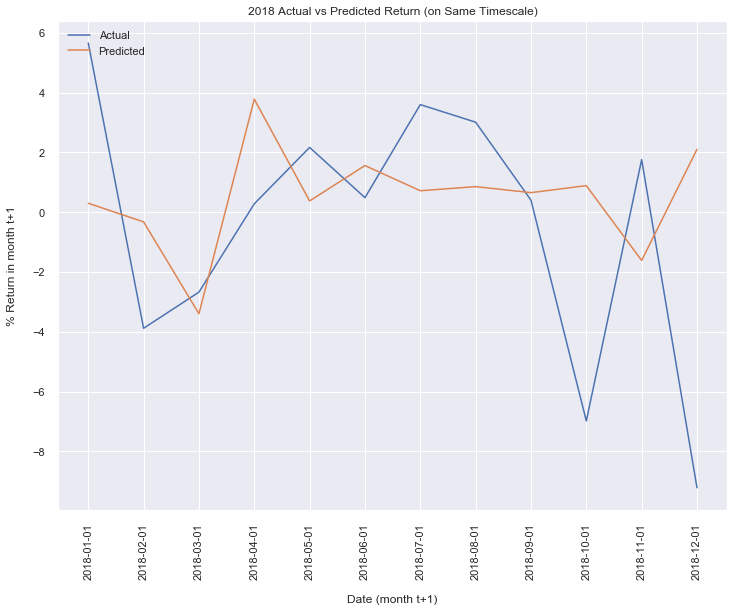

In [313]:
sns.set()
x = df_summary['month']
fig = plt.figure(figsize=(12,9))
plt.plot(x, df_summary['ersf'])
plt.plot(x, df_summary['pred_ret_next_mo'])

plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.title('2018 Actual vs Predicted Return (on Same Timescale)')
plt.xticks(df_summary['month'], rotation='vertical')
plt.xlabel('Date (month t+1)', labelpad=15)
plt.ylabel('% Return in month t+1', labelpad=15)

plt.show();


In [395]:
dec_2018_return = df_summary['ersf'].loc[df_summary['month'] == '2018-12-01']
z_score = (dec_2018_return - df04['ersf'].mean()) / df04['ersf'].std()
z_score

from scipy.stats import norm
two_tailed = 2 * norm.cdf(z_score)
two_tailed

11   -2.542221
Name: ersf, dtype: float64

array([0.01101505])

## Playground - Experiment with New Engineered Variables

In [314]:
df04.tail()
df04.shape

,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D
163,2017-08-01,2471.649902,47.855075,0.000842,1.16,4.5638,96.8,51.648647,0.76,5.472033,7.0,0.131911,2.006883,-1.877269,-13.140885,27.0,4.0
164,2017-09-01,2519.360107,48.173103,0.000858,1.15,4.9171,95.1,52.298066,0.75,5.112567,3.9,2.006883,2.289827,1.874972,7.312391,24.0,-3.0
165,2017-10-01,2575.260010,48.426075,0.000892,1.15,6.5894,100.7,53.179202,0.75,5.356767,13.5,2.289827,0.427026,0.282943,3.819735,29.0,5.0
166,2017-11-01,2584.840088,48.679047,0.001025,1.16,6.9722,98.5,53.099644,0.75,6.159567,4.7,0.427026,3.482009,-1.862801,-8.755164,32.0,3.0
167,2017-12-01,2673.610107,48.932019,0.001100,1.30,6.1073,95.9,54.639276,0.76,6.556300,-2.3,3.482009,5.655429,3.054983,-7.026461,34.0,2.0


(168, 17)

In [336]:
#Import Volume Weighted Moving Average Data
fileX = '04_18_withVWMA.csv'
data = pd.read_csv(fileX)

df_vwma = pd.DataFrame(data)

In [338]:
df_vwma = pd.concat([df04, df_vwma], axis = 1)

In [339]:
df_vwma.head()
df_vwma.tail()

,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,...,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Date,Close,Volume,vwma,vwma_return_delta
0,2004-01-01,1131.13,17.598000,0.000733,1.00,14.0860,103.8,64.276054,-0.24,16.151067,...,1.274621,-3.352254,-71.738239,28.0,0.273743,2004-01-31,1131.13,32820000000,1132.902945,0.049492
1,2004-02-01,1144.94,17.811000,0.000775,1.01,9.8728,94.4,64.282747,-0.25,14.917533,...,-1.583041,-0.511577,-7.417861,28.0,0.000000,2004-02-29,1144.94,27985600000,1142.563293,0.008527
2,2004-03-01,1126.21,18.024000,0.000783,1.00,9.4462,95.8,62.483910,-0.25,11.135000,...,-1.622623,-2.857662,-52.009454,26.0,-2.000000,2004-03-31,1126.21,33597900000,1119.019373,-0.020606
3,2004-04-01,1107.30,18.216667,0.000783,1.00,13.4427,94.2,60.784995,-0.26,10.920567,...,1.261890,-0.039582,-0.324572,25.0,-1.000000,2004-04-30,1107.30,31611900000,1132.278261,0.011849
4,2004-05-01,1120.68,18.409333,0.000850,1.00,5.2403,90.2,60.875643,-0.26,9.376400,...,1.831398,2.884513,-5.480574,23.0,-2.000000,2004-05-31,1120.68,29326400000,1102.747364,-0.026081


,EOM,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,...,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Date,Close,Volume,vwma,vwma_return_delta
163,2017-08-01,2471.649902,47.855075,0.000842,1.16,4.5638,96.8,51.648647,0.76,5.472033,...,2.006883,-1.877269,-13.140885,27.0,4.0,2017-08-31,2471.65,70616030000,2453.533648,-0.000720
164,2017-09-01,2519.360107,48.173103,0.000858,1.15,4.9171,95.1,52.298066,0.75,5.112567,...,2.289827,1.874972,7.312391,24.0,-3.0,2017-09-30,2519.36,66337980000,2492.880424,0.016037
165,2017-10-01,2575.260010,48.426075,0.000892,1.15,6.5894,100.7,53.179202,0.75,5.356767,...,0.427026,0.282943,3.819735,29.0,5.0,2017-10-31,2575.26,70871570000,2560.400262,0.027085
166,2017-11-01,2584.840088,48.679047,0.001025,1.16,6.9722,98.5,53.099644,0.75,6.159567,...,3.482009,-1.862801,-8.755164,32.0,3.0,2017-11-30,2647.58,73173260000,2595.268508,0.013618
167,2017-12-01,2673.610107,48.932019,0.001100,1.30,6.1073,95.9,54.639276,0.76,6.556300,...,5.655429,3.054983,-7.026461,34.0,2.0,2017-12-31,2673.61,65251190000,2662.943427,0.026076


In [340]:
df_vwma.describe()
df_vwma.corr()

,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Close,Volume,vwma,vwma_return_delta
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,1.680000e+02,168.000000,168.000000
mean,1522.179168,30.249718,0.000999,1.341131,13.576756,81.947619,50.869848,-0.008988,13.648133,0.652976,0.667949,0.690980,-0.009860,-2.599680,25.440476,0.037344,1522.820476,7.428571e+10,1517.459732,0.006047
std,443.859461,8.958708,0.001367,1.769762,12.989038,11.785792,6.591079,1.259412,10.059378,10.351389,3.886939,3.905026,5.113633,58.594285,9.801443,9.600349,445.043013,2.562913e+10,440.965477,0.035575
min,735.090000,17.598000,0.000008,0.070000,-9.470800,55.300000,26.602531,-4.100000,3.052700,-29.200000,-16.793245,-16.793245,-11.633423,-238.769031,14.000000,-50.000000,735.090000,2.658680e+10,761.728173,-0.219648
25%,1190.170000,22.992000,0.000056,0.127500,5.828050,73.575000,47.992094,-0.090000,7.129600,-4.350000,-1.407628,-1.407628,-3.601212,-16.721380,20.000000,-3.000000,1190.170000,6.218296e+10,1196.623218,-0.006150
50%,1378.935000,27.556500,0.000183,0.230000,9.963050,83.050000,51.074718,0.030000,10.431000,1.900000,1.036320,1.036320,-0.055229,-0.272416,23.000000,0.000000,1378.935000,7.475207e+10,1369.054500,0.012460
75%,1924.500000,37.473505,0.001448,2.002500,17.149400,92.025000,55.652819,0.407500,14.947467,7.100000,2.996938,3.008325,2.903168,12.706484,27.000000,2.000000,1925.345000,8.615378e+10,1906.242603,0.025709
max,2673.610107,48.932019,0.004192,5.260000,77.816100,103.800000,64.282747,2.070000,59.880367,21.800000,10.959159,10.959159,19.571232,279.621622,100.000000,43.000000,2673.610000,1.618436e+11,2662.943427,0.116445


,Index,D12,Rfree,fed_funds,VRP,ICS_ALL,pd,ff12_D,vrp3,sent12_D,ersf,ersf_t1,ersf_D,sent_x_ersf_D,Google,Google_D,Close,Volume,vwma,vwma_return_delta
Index,1.000000,0.926910,-0.197435,-0.189128,-0.377489,0.579347,0.091090,0.240900,-0.460633,0.233288,0.131134,0.039784,0.004965,0.056154,0.082610,0.031602,0.999914,-0.114246,0.998506,0.128850
D12,0.926910,1.000000,-0.372532,-0.355154,-0.198381,0.361418,-0.283143,-0.030664,-0.265411,0.135172,0.042347,0.061087,0.014146,0.025965,0.234291,0.018707,0.926739,0.183278,0.927670,0.024514
Rfree,-0.197435,-0.372532,1.000000,0.991658,-0.270263,0.267316,0.477579,0.422660,-0.363454,-0.243364,-0.069381,-0.088300,-0.019006,0.050823,-0.101470,0.027062,-0.197329,-0.458897,-0.196965,-0.026406
fed_funds,-0.189128,-0.355154,0.991658,1.000000,-0.268302,0.230430,0.448993,0.357401,-0.355477,-0.281639,-0.088243,-0.109110,-0.018672,0.047813,-0.077483,0.034542,-0.189140,-0.413232,-0.188681,-0.050427
VRP,-0.377489,-0.198381,-0.270263,-0.268302,1.000000,-0.483545,-0.468140,-0.371260,0.769026,-0.060501,-0.240775,0.204762,-0.122761,0.018431,0.009761,-0.093908,-0.376806,0.423392,-0.356875,-0.034221
ICS_ALL,0.579347,0.361418,0.267316,0.230430,-0.483545,1.000000,0.582132,0.635770,-0.599270,0.489859,0.109358,0.056348,-0.062101,0.015227,-0.063983,0.032589,0.579128,-0.654935,0.581680,0.185325
pd,0.091090,-0.283143,0.477579,0.448993,-0.468140,0.582132,1.000000,0.706587,-0.512646,0.231991,0.195010,-0.070603,-0.030940,0.068783,-0.363775,0.032186,0.091060,-0.824678,0.085774,0.237527
ff12_D,0.240900,-0.030664,0.422660,0.357401,-0.371260,0.635770,0.706587,1.000000,-0.418635,0.347842,0.212527,0.199452,-0.012541,0.034151,-0.330206,0.025709,0.240777,-0.696994,0.237654,0.247126
vrp3,-0.460633,-0.265411,-0.363454,-0.355477,0.769026,-0.599270,-0.512646,-0.418635,1.000000,-0.004952,0.072134,0.287742,0.087702,-0.130402,0.032049,-0.046311,-0.460083,0.559166,-0.455344,0.041022
sent12_D,0.233288,0.135172,-0.243364,-0.281639,-0.060501,0.489859,0.231991,0.347842,-0.004952,1.000000,0.267856,0.194197,-0.049284,-0.064181,-0.232290,0.001956,0.233375,-0.209678,0.235422,0.340324


In [341]:
#Model with 'positive_vwma' variable 
lr_model_with_VWMA = ols(formula='ersf_t1~pd+ff12_D+vrp3+sent_x_ersf_D+Google_D+vwma_return_delta', data=df_vwma).fit()
lr_model_with_VWMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ersf_t1   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     12.30
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           2.23e-11
Time:                        13:32:38   Log-Likelihood:                -435.03
No. Observations:                 168   AIC:                             884.1
Df Residuals:                     161   BIC:                             905.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.8430      3.175      1.840      0.068      -0.428      12.114
pd                   -0.1391      0.059     -2.359      0.020      -0.256      -0.023
ff12_D                1.6985      0.291      5.847      0.000       1.125       2.272
vrp3                  0.1440      0.030      4.727      0.000       0.084       0.204
sent_x_ersf_D        -0.0090      0.005     -1.966      0.051      -0.018    4.11e-05
Google_D             -0.0945      0.030     -3.171      0.002      -0.153      -0.036
vwma_return_delta    -7.3145      8.308     -0.880      0.380     -23.720       9.091
==============================================================================
Omnibus:                       10.036   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.383
Skew:                          -0.606   Prob(JB):                      0.00556
Kurtosis:                       3.128   Cond. No.                     1.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""